In [3]:
import pandas as pd
zip_file = r"C:\Users\Aishwarya Desu\Downloads\complaints.csv.zip"
output_file = r"complaints_split.csv"
category_map = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}
chunksize = 100000  
filtered_chunks = []

for chunk in pd.read_csv(zip_file, compression='zip', chunksize=chunksize, low_memory=False):
    chunk = chunk[['Product','Consumer complaint narrative']].dropna()
    chunk = chunk[chunk['Product'].isin(category_map.keys())]
    chunk['Category'] = chunk['Product'].map(category_map)
    
    filtered_chunks.append(chunk)
final_df = pd.concat(filtered_chunks)
final_df.to_csv(output_file, index=False)

print("✅ Done! Filtered dataset saved at:", output_file)
print(final_df['Category'].value_counts())

✅ Done! Filtered dataset saved at: complaints_split.csv
Category
0    807277
1    364007
3    133980
2      9461
Name: count, dtype: int64


In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = r"complaints_split.csv"
df = pd.read_csv(file_path)

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Clean and preprocess the text data."""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(words)

# Apply preprocessing
df['Clean_Text'] = df['Consumer complaint narrative'].apply(preprocess_text)

# Save cleaned data
clean_file_path = r"preprocessed_complaint.csv"
df.to_csv(clean_file_path, index=False)

print(f"✅ Text preprocessing done! Cleaned CSV saved at: {clean_file_path}")


[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Desu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Desu\AppData\Roaming\nltk_data...


✅ Text preprocessing done! Cleaned CSV saved at: preprocessed_complaint.csv


Dataset shape: (1314725, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314725 entries, 0 to 1314724
Data columns (total 4 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Product                       1314725 non-null  object
 1   Consumer complaint narrative  1314725 non-null  object
 2   Category                      1314725 non-null  int64 
 3   Clean_Text                    1314723 non-null  object
dtypes: int64(1), object(3)
memory usage: 40.1+ MB
None
                                             Product  \
0  Credit reporting, credit repair services, or o...   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                        Consumer complaint narrative  Category  \
0                         These are not m

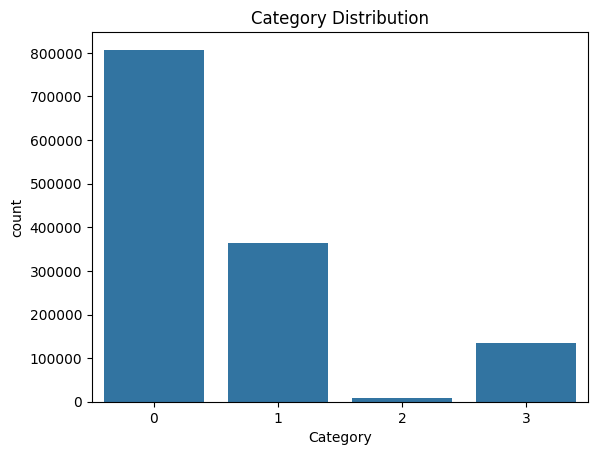


Text length statistics:
count    1.314725e+06
mean     9.812261e+02
std      1.274840e+03
min      4.000000e+00
25%      3.320000e+02
50%      6.300000e+02
75%      1.147000e+03
max      3.261600e+04
Name: text_length, dtype: float64


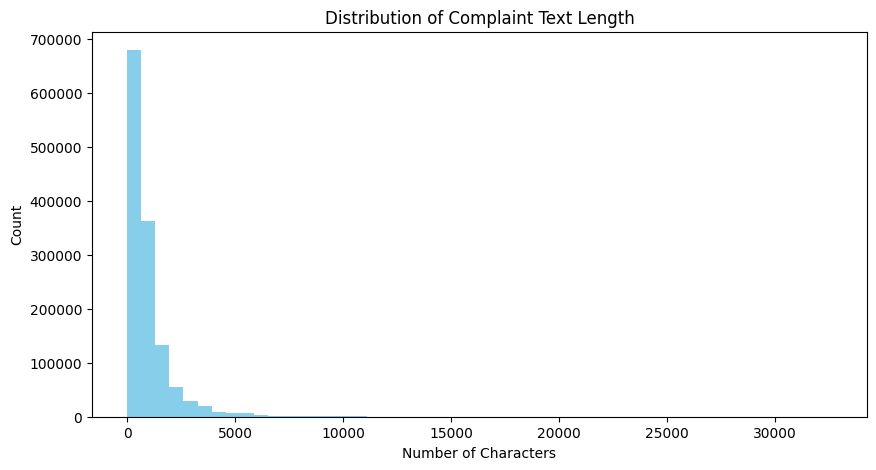

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv(clean_file_path)

# Display basic information
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

# Category distribution
print("\nCategory counts:")
print(df['Category'].value_counts())
sns.countplot(x='Category', data=df)
plt.title("Category Distribution")
plt.show()

# Text length analysis
df['text_length'] = df['Consumer complaint narrative'].astype(str).apply(len)
print("\nText length statistics:")
print(df['text_length'].describe())
plt.figure(figsize=(10,5))
plt.hist(df['text_length'], bins=50, color='skyblue')
plt.title("Distribution of Complaint Text Length")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Desu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Desu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (1314725, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314725 entries, 0 to 1314724
Data columns (total 4 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Product                       1314725 non-null  object
 1   Consumer complaint narrative  1314725 non-null  object
 2   Category                      1314725 non-null  int64 
 3   Clean_Text                    1314723 non-null  object
dtypes: int64(1), object(3)
memory usage: 40.1+ MB
None

📌 Logistic Regression
Accuracy: 0.8769780752628876
              precision    recall  f1-score   support

           0       0.95      0.88      0.91    161456
           1       0.82      0.85      0.84     72801
           2       0.16      0.86      0.28      1892
           3       0.87      0.95      0.91     26796

    accuracy                           0.88    262945
   macro avg       0.70      0.88      0.73    262945
weighted avg

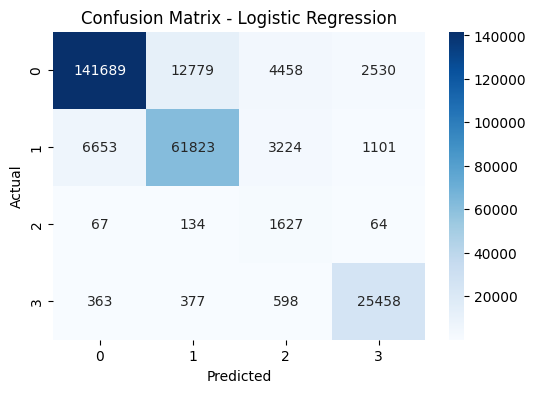


📌 Naive Bayes
Accuracy: 0.8708094848732625
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    161456
           1       0.84      0.76      0.80     72801
           2       0.48      0.23      0.31      1892
           3       0.80      0.94      0.87     26796

    accuracy                           0.87    262945
   macro avg       0.76      0.71      0.72    262945
weighted avg       0.87      0.87      0.87    262945



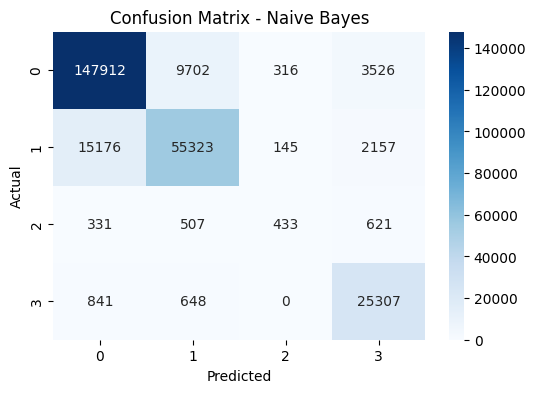

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load the preprocessed dataset
file_path = r"preprocessed_complaint.csv"
df = pd.read_csv(file_path)

# Replace NaN values in 'Consumer complaint narrative' with an empty string
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

# Check the shape and info of the dataset
print("Dataset shape:", df.shape)
print(df.info())

# Split the data into features and target
X = df['Consumer complaint narrative']
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n📌 {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot model comparison
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

# Identify the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with accuracy {results[best_model_name]:.2f}")

# Function to predict the category of a new complaint
def predict_category(text, model, vectorizer):
    lemmatizer = WordNetLemmatizer()
    
    # Preprocess the text
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(w) for w in text.split()]
    clean_text = " ".join(words)
    
    # Transform the text and predict
    vector = vectorizer.transform([clean_text])
    return model.predict(vector)[0]
